In [1]:
import os
os.chdir('/home/divij/Desktop/Divij/ML/Mushrooms/')

In [2]:
import csv, pandas as pd, numpy as np

In [3]:
import sklearn

In [4]:
mushrooms = pd.read_csv('mushrooms.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 0)
X = mushrooms.loc[:, 'cap-shape':'habitat']
y = pd.DataFrame(mushrooms['class'])

In [5]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
onehot_encoder = OneHotEncoder(categorical_features=[0])

In [8]:
X_encoded = MultiColumnLabelEncoder(columns=list(X.columns)).fit_transform(X)

In [9]:
X_1h_encoder = OneHotEncoder(categorical_features='all')

In [10]:
X_processed = X_1h_encoder.fit_transform(X_encoded).toarray()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
logisticRegressor = LogisticRegression()

In [15]:
y_train.shape

(6093, 1)

In [16]:
logisticRegressor.fit(x_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
predictions = logisticRegressor.predict(x_test)

In [18]:
score = logisticRegressor.score(x_test, y_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
score

1.0

In [21]:
regression_coefficients = logisticRegressor.coef_[0][0]

In [22]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1061
          p       1.00      1.00      1.00       970

avg / total       1.00      1.00      1.00      2031



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [24]:
cm = metrics.confusion_matrix(y_test, predictions)

In [25]:
mushrooms

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m,e


Text(0.5,1,'Accuracy Score: 1.0')

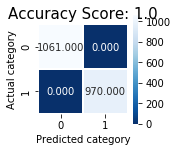

In [26]:
# Plotting the confusion matrix into a heatmap
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual category')
plt.xlabel('Predicted category')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [27]:
# Individual Weights of each feature on mushroom's class after encoded.
categorical_features = (X_encoded.dtypes.values != np.dtype('float64'))
categorical = X_encoded.columns[categorical_features]
uniq_vals = X[categorical].apply(lambda x: x.value_counts()).unstack()
uniq_vals = uniq_vals[~uniq_vals.isnull()]
enc_cols = list(uniq_vals.index.map('{0[0]}_{0[1]}'.format)) # https://stackoverflow.com/questions/41987743/merge-two-multiindex-levels-into-one-in-pandas
enc_df = pd.DataFrame(X, columns=enc_cols, index=X_encoded.index, dtype='bool')
coefs = logisticRegressor.coef_[0]
# weights dictionary to hold actual weights values for all encoded features
weights = {}
for name, value in zip(enc_cols, coefs):
    weights[name] = value
#     print(name, ':', value)

In [32]:
# Print the total number of features that the model was worked on.
len(weights.keys())

117